In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import funcs as fc
import seaborn as sns


In [4]:
data1 = pd.read_csv('./normalized/original_moned_DataSet.csv', sep='\t')
data2 = pd.read_csv('./normalized/recover_bert.csv', sep='\t')

In [5]:
data2[['AGE','BIRTHPLACE','ETHNICITY','GENDER','RACE','CONDITION','DEATH', 'count']][0:9]

,AGE,BIRTHPLACE,ETHNICITY,GENDER,RACE,CONDITION,DEATH,count
0,3-3,US,arab,FEMALE,other,"Acute viral pharyngitis (disorder),Viral sinus...",0,4
1,37-37,US,arab,FEMALE,other,"Acute viral pharyngitis (disorder),Viral sinus...",0,5
2,72-72,US,arab,FEMALE,other,"Viral sinusitis (disorder),Acute bronchitis (d...",0,4
3,12-12,US,arab,FEMALE,other,"Viral sinusitis (disorder),Acute bronchitis (d...",0,5
4,8-8,US,arab,MALE,other,"Acute bronchitis (disorder),Viral sinusitis (d...",0,6
5,7-7,US,arab,MALE,other,"Viral sinusitis (disorder),Acute viral pharyng...",0,4
6,38-38,US,arab,MALE,other,"Viral sinusitis (disorder),Acute viral pharyng...",0,4
7,24-24,US,arab,MALE,other,"Viral sinusitis (disorder),Acute viral pharyng...",0,4
8,1-1,US,arab,MALE,other,"Viral sinusitis (disorder),Chronic kidney dise...",0,4


In [6]:
data1[['AGE','BIRTHPLACE','ETHNICITY','GENDER','RACE','CONDITION','DEATH', 'count']][0:9]

,AGE,BIRTHPLACE,ETHNICITY,GENDER,RACE,CONDITION,DEATH,count
0,29 - 40,US,arab,FEMALE,other,"Chronic sinusitis (disorder),Cystitis,Concussi...",0,3
1,47 - 58,US,american_indian,MALE,native,"Idiopathic atrophic hypothyroidism,Fracture of...",0,3
2,2 - 6,US,american_indian,MALE,native,Perennial allergic rhinitis with seasonal vari...,0,5
3,1 - 3,US,american_indian,FEMALE,native,"Closed fracture of hip,Perennial allergic rhin...",0,4
4,41 - 43,US,arab,FEMALE,other,"Acute viral pharyngitis (disorder),Acute bronc...",0,5
5,0 - 13,"GR,DE","greek,german",FEMALE,white,"Closed fracture of hip,Facial laceration,Fract...",0,5
6,2 - 4,GT,central_american,FEMALE,hispanic,Perennial allergic rhinitis with seasonal vari...,0,3
7,6 - 11,GT,central_american,FEMALE,hispanic,"Child attention deficit disorder,Acute bacteri...",0,5
8,18 - 24,GT,central_american,FEMALE,hispanic,Fracture of the vertebral column with spinal c...,0,3


In [19]:
data = pd.read_csv('./data/finalPatientDataSet_20.csv', sep='\t')

data_convert = pd.read_csv('./data/convert_finalPatientDataSet_20.csv', sep='\t')


In [8]:
data[3:10]

,AGE,RACE,ETHNICITY,GENDER,BIRTHPLACE,CONDITIOIN,DEATH
3,44,white,english,MALE,US,Viral sinusitis (disorder),0
4,42,black,west_indian,MALE,DO,Fracture subluxation of wrist,0
5,49,hispanic,south_american,MALE,US,Viral sinusitis (disorder),0
6,82,white,irish,MALE,US,Chronic congestive heart failure (disorder),1
7,72,native,american_indian,MALE,US,Atrial Fibrillation,0
8,10,asian,asian_indian,FEMALE,US,Acute bronchitis (disorder),0
9,23,hispanic,puerto_rican,FEMALE,PR,Normal pregnancy,0


In [20]:
data_convert[3:10]

,AGE,RACE,ETHNICITY,GENDER,BIRTHPLACE,CONDITION,DEATH
3,44,1.000000,0.861287,1.000000,1.000000,0.963733,0
4,42,0.958610,0.914776,1.000000,0.914105,0.934412,0
5,49,0.822805,0.924761,1.000000,1.000000,0.963733,0
6,82,1.000000,0.911478,1.000000,1.000000,1.000000,1
7,72,0.884594,0.949396,1.000000,1.000000,0.934874,0
8,10,0.858757,0.916463,0.981383,1.000000,0.967534,0
9,23,0.822805,1.000000,0.981383,0.859541,0.903302,0


In [10]:
org_moned_dataset_wc = fc.readCSV('./normalized/recover_origin_wc.csv', sep='\t')
berted_dataset_bert_wc = fc.readCSV('./normalized/recover_bert_wc.csv', sep='\t')
berted_dataset_bert_wc[0:2]
columnList = berted_dataset_bert_wc[0]
print(columnList)

['AGE', 'BIRTHPLACE', 'CONDITION', 'DEATH', 'ETHNICITY', 'GENDER', 'RACE']


In [11]:
# def getLengthCount(sourceDataSet, colIDX):
#     tempDict = dict()
#     for data in sourceDataSet:
#         diversityCNT = len(data[colIDX].split(','))
#         if diversityCNT not in tempDict:
#             tempDict[diversityCNT] = 0
            
#         tempDict[diversityCNT] += 1
     
#     sortedResult = sorted(tempDict.items(), key=lambda x:x[1], reverse=True)
#     return sortedResult
   
# print(getLengthCount(org_moned_dataset_wc[1:], 2))
# print(getLengthCount(berted_dataset_bert_wc[1:], 2))

In [12]:
def getLengthCount(sourceDataSet, colList):
    tempDict = dict()    
    for data in sourceDataSet:
        diversityCNT = int(data[-1])
        if diversityCNT not in tempDict:
            tempDict[diversityCNT] = 0

        tempDict[diversityCNT] += 1
        
    sortedResult = sorted(tempDict.items(), key=lambda x:x[1], reverse=True)        
    return sortedResult

def displayDataSetInfo(sourceDataSet):
    minNum = min([data[0] for data in sourceDataSet])
    maxNum = max([data[0] for data in sourceDataSet])
    
    print("데이터 셋 K 값의 범주")
    print("min :", minNum, "max :", maxNum)
    print(sourceDataSet, "\n")
    
    print("데이터 셋 K 값의 top10")
    print("top 10 :", sourceDataSet[0:10])    
    print("============================================================\n")


In [13]:
org_moned_dataset = fc.readCSV('./normalized/original_moned_DataSet.csv', sep='\t')
berted_dataset_bert = fc.readCSV('./normalized/recover_bert.csv', sep='\t')

In [14]:
berted_dataset_bert[0:10]

[['AGE',
  'BIRTHPLACE',
  'CONDITION',
  'DEATH',
  'ETHNICITY',
  'GENDER',
  'RACE',
  'count'],
 ['3-3',
  'US',
  'Acute viral pharyngitis (disorder),Viral sinusitis (disorder)',
  '0',
  'arab',
  'FEMALE',
  'other',
  '4'],
 ['37-37',
  'US',
  'Acute viral pharyngitis (disorder),Viral sinusitis (disorder)',
  '0',
  'arab',
  'FEMALE',
  'other',
  '5'],
 ['72-72',
  'US',
  'Viral sinusitis (disorder),Acute bronchitis (disorder),Anemia (disorder)',
  '0',
  'arab',
  'FEMALE',
  'other',
  '4'],
 ['12-12',
  'US',
  'Viral sinusitis (disorder),Acute bronchitis (disorder),Acute viral pharyngitis (disorder),Chronic sinusitis (disorder)',
  '0',
  'arab',
  'FEMALE',
  'other',
  '5'],
 ['8-8',
  'US',
  'Acute bronchitis (disorder),Viral sinusitis (disorder)',
  '0',
  'arab',
  'MALE',
  'other',
  '6'],
 ['7-7',
  'US',
  'Viral sinusitis (disorder),Acute viral pharyngitis (disorder)',
  '0',
  'arab',
  'MALE',
  'other',
  '4'],
 ['38-38',
  'US',
  'Viral sinusitis (disord

In [15]:


sourceColumns = ['CONDITION', 'ETHNICITY']

print("dataset : org_moned_dataset\n")
sorted_org_moned_datase = getLengthCount(org_moned_dataset[1:], sourceColumns)
displayDataSetInfo(sorted_org_moned_datase)

print("dataset : berted_dataset_bert\n")
sorted_berted_dataset_bert = getLengthCount(berted_dataset_bert[1:], sourceColumns)
displayDataSetInfo(sorted_berted_dataset_bert)


dataset : org_moned_dataset

데이터 셋 K 값의 범주
min : 1 max : 198
[(3, 10660), (1, 7372), (4, 7029), (2, 5612), (5, 4567), (6, 2108), (7, 1533), (8, 948), (9, 776), (10, 528), (11, 448), (12, 320), (13, 302), (14, 260), (15, 210), (16, 202), (17, 153), (18, 126), (19, 116), (20, 116), (21, 115), (24, 91), (22, 84), (25, 82), (23, 82), (26, 65), (29, 59), (27, 52), (30, 50), (28, 44), (32, 43), (31, 42), (33, 36), (34, 30), (44, 29), (39, 26), (37, 26), (36, 24), (35, 22), (41, 22), (40, 20), (52, 20), (38, 20), (45, 18), (51, 14), (46, 14), (47, 12), (49, 12), (57, 11), (48, 10), (43, 10), (50, 9), (42, 8), (61, 8), (59, 8), (68, 8), (74, 6), (63, 6), (60, 6), (58, 6), (55, 6), (64, 6), (54, 6), (75, 5), (53, 5), (67, 5), (56, 4), (62, 4), (78, 4), (97, 3), (73, 3), (65, 3), (91, 3), (66, 3), (80, 3), (104, 2), (93, 2), (82, 2), (69, 2), (83, 2), (70, 2), (79, 2), (90, 2), (87, 1), (156, 1), (105, 1), (127, 1), (98, 1), (110, 1), (96, 1), (108, 1), (126, 1), (169, 1), (198, 1), (100, 1), (1

In [16]:
print("개별 일반화 튜플 중 최고 레코드 수")
print(max([int(data[-1]) for data in sorted_org_moned_datase[1:]]))
print(max([int(data[-1]) for data in berted_dataset_bert[1:]]))

개별 일반화 튜플 중 최고 레코드 수
7372
275


In [17]:
sorted_org_moned_datase_pd = pd.DataFrame(sorted_org_moned_datase[1:21])
bar_sorted_bert_pd = pd.DataFrame(sorted_berted_dataset_bert[1:21])

print(sorted_org_moned_datase_pd.describe())
print(bar_sorted_bert_pd.describe())

               0            1
count  20.000000    20.000000
mean   11.400000  1642.050000
std     6.081897  2421.160498
min     1.000000   115.000000
25%     6.750000   189.750000
50%    11.500000   384.000000
75%    16.250000  1676.750000
max    21.000000  7372.000000
               0            1
count  20.000000    20.000000
mean   11.400000  1379.300000
std     6.081897  2093.919143
min     1.000000    98.000000
25%     6.750000   173.500000
50%    11.500000   331.000000
75%    16.250000  1259.000000
max    21.000000  6971.000000


> ### 전체  k 비교 막대, 파이 차트(origin VS BERT)

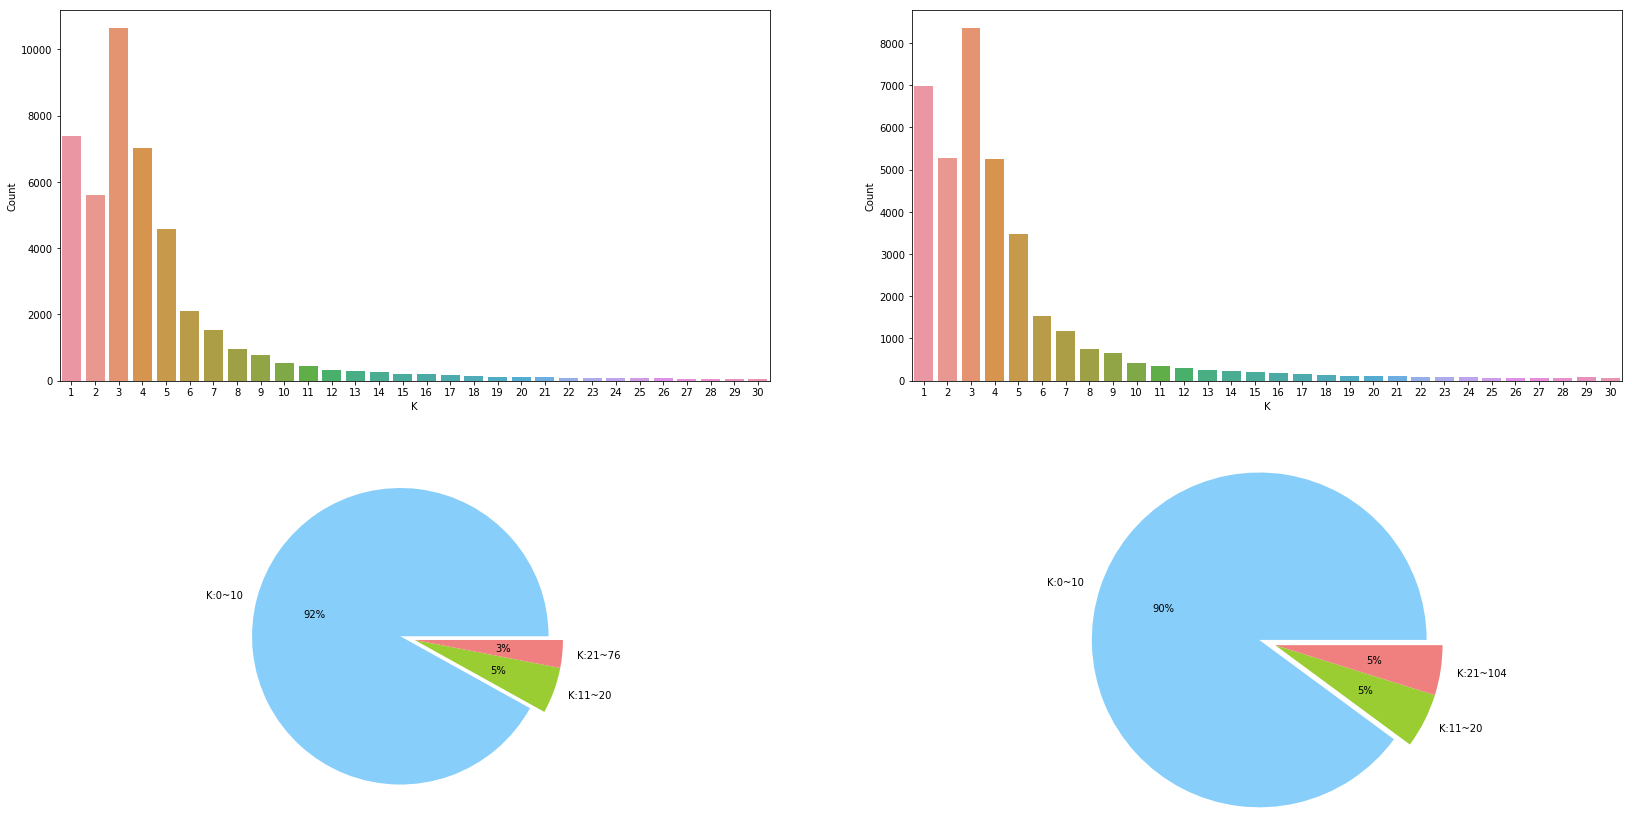

In [21]:
sorted_org_moned_datase

bar_sorted_org_pd = pd.DataFrame(sorted_org_moned_datase[0:30], columns=['K', 'Count'])
bar_sorted_bert_pd = pd.DataFrame(sorted_berted_dataset_bert[0:30], columns=['K', 'Count'])

figure,((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(28,15)

sns.barplot(data=bar_sorted_org_pd, x='K', y='Count', ax=ax1)
sns.barplot(data=bar_sorted_bert_pd, x='K', y='Count', ax=ax2)


org_labels = ['K:0~10', 'K:11~20', 'K:21~'+ str(sorted_org_moned_datase[-1][0])]
bert_labels = ['K:0~10', 'K:11~20', 'K:21~'+ str(sorted_berted_dataset_bert[-1][0])]

org_sizes = [sum([data[-1] for data in sorted_org_moned_datase if data[0] <11]),
             sum([data[-1] for data in sorted_org_moned_datase if 11 <= data[0] <21]),
             sum([data[-1] for data in sorted_org_moned_datase if 21<=data[0]])
            ]

bert_sizes = [sum([data[-1] for data in sorted_berted_dataset_bert if data[0] <11]),
             sum([data[-1] for data in sorted_berted_dataset_bert if 11 <= data[0] <21]),
             sum([data[-1] for data in sorted_berted_dataset_bert if 21<=data[0]])
            ]
                 
colors = ['lightskyblue','yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)
ax3.pie(org_sizes, labels=org_labels, autopct='%1.0f%%',  explode=explode, colors=colors)
ax4.pie(bert_sizes, labels=bert_labels, autopct='%1.0f%%',  explode=explode, colors=colors)
plt.axis('equal')
plt.show()



> ### TOP 10k 비교 막대차트(origin VS BERT)

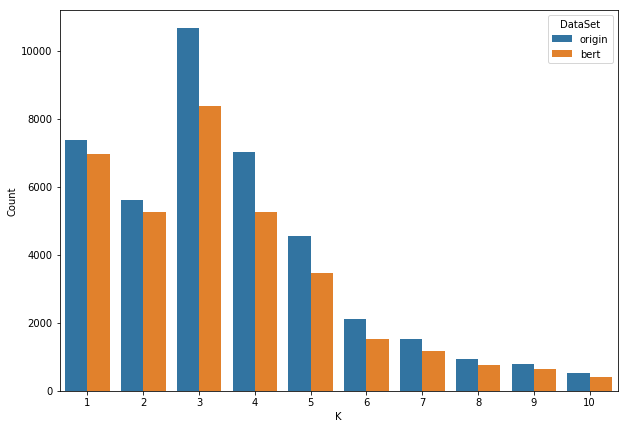

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
chartDataSet_A_1 = [[int(data[0]), int(data[1]), 'origin'] for data in sorted_org_moned_datase]
chartDataSet_A_2 = [[int(data[0]), int(data[1]), 'bert'] for data in sorted_berted_dataset_bert]
chartDataSet_A = chartDataSet_A_1[0:10] +chartDataSet_A_2[0:10]

dataSource_pd = pd.DataFrame(chartDataSet_A, columns=['K', 'Count', 'DataSet'])
sns.barplot(data=dataSource_pd, x='K', y='Count', hue='DataSet')




In [ ]:
chartDataSet_A_1